# Processing TESS data from TOI4504

In [1]:
%matplotlib inline
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'


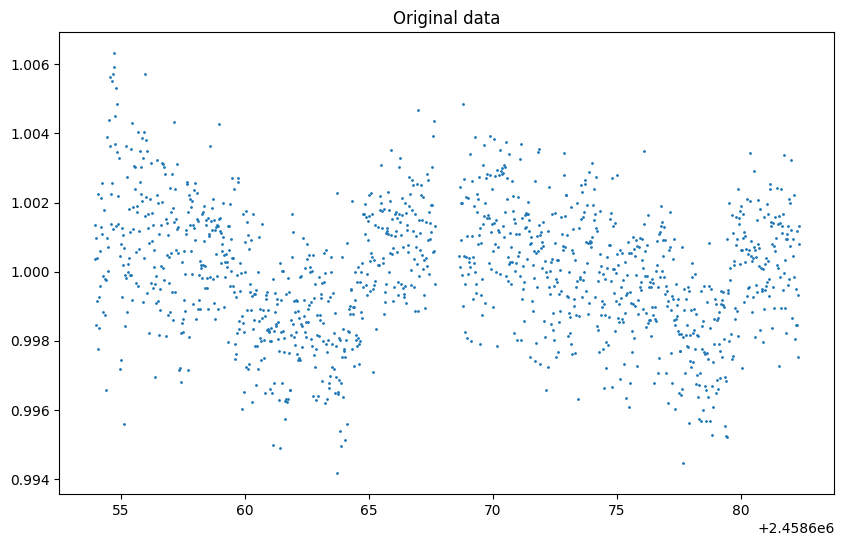

,time,flux,flux_err
0,2.458654e+06,1.001356,0.001496
1,2.458654e+06,1.000368,0.001496
2,2.458654e+06,1.000971,0.001496
3,2.458654e+06,0.998457,0.001496
4,2.458654e+06,0.999149,0.001496
...,...,...,...
1302,2.458682e+06,1.001188,0.001496
1303,2.458682e+06,0.999312,0.001496
1304,2.458682e+06,0.997533,0.001496
1305,2.458682e+06,1.000808,0.001496


In [2]:
full_path = path + "13/13_QLP_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

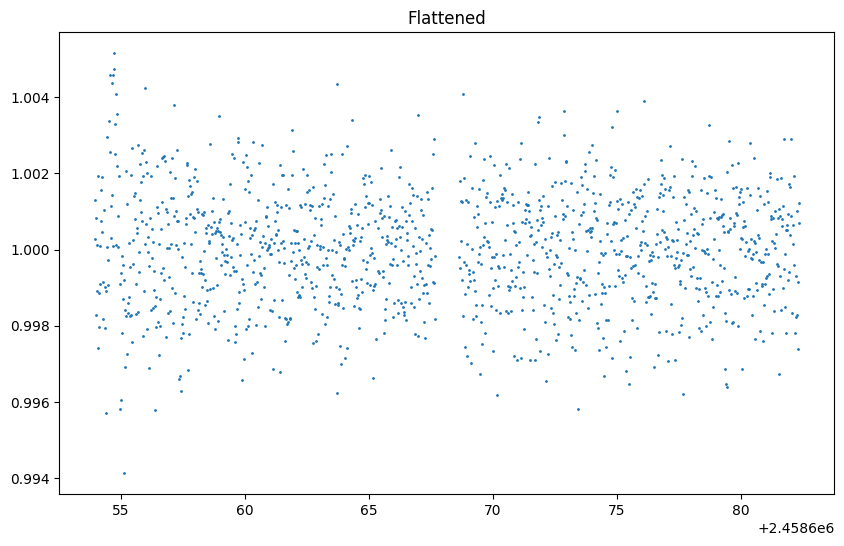

In [3]:
lc = df2lc(df)
lc = lc.flatten(
    window_length=101,  # Must be odd integer. Controls smoothness (longer → stronger smoothing).
    polyorder=2,        # Polynomial order (must be < window_length)
    break_tolerance=5,  # Split data at large time gaps.
    niters=3,           # Iterative sigma-clipping rounds. Remove outliers during flattening.
    sigma=3             # Outlier clipping threshold. Remove outliers during flattening.
)
# Use return_trend=True to retrieve the removed trend component.
df = lc2df(lc)
plot_this(df.time, [df.flux], ["flux"], title="Flattened")

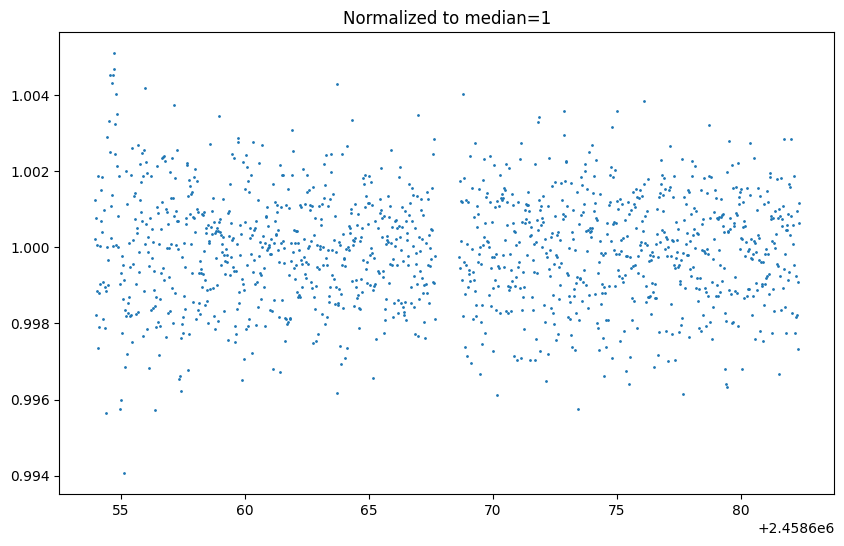

,time,flux,flux_err
0,2.458654e+06,1.001239,0.001496
1,2.458654e+06,1.000207,0.001496
2,2.458654e+06,1.000767,0.001496
3,2.458654e+06,0.998211,0.001496
4,2.458654e+06,0.998860,0.001496
...,...,...,...
1302,2.458682e+06,1.000955,0.001496
1303,2.458682e+06,0.999097,0.001496
1304,2.458682e+06,0.997335,0.001496
1305,2.458682e+06,1.000628,0.001496


In [4]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [5]:
df2csv(df, full_path[:-4]+"_p.csv")